In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Context

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow

Content

This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training a binary classification model. Not excluding it will leak the answers to your model and reduce its predictability. 

1. Date…The date of observation
2. Location…The common name of the location of the weather station
3. MinTemp…The minimum temperature in degrees celsius
4. MaxTemp…The maximum temperature in degrees celsius
5. Rainfall…The amount of rainfall recorded for the day in mm
6. Evaporation…The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine…The number of hours of bright sunshine in the day.
8. WindGustDir…The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed…The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am…Direction of the wind at 9am
11. WindDir3pm…Direction of the wind at 3pm
12. WindSpeed9am…Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm…Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am…Humidity (percent) at 9am
15. Humidity3pm…Humidity (percent) at 3pm
16. Pressure9am…Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm…Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am…Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
19. Cloud3pm…Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
20. Temp9am…Temperature (degrees C) at 9am
21. Temp3pm…Temperature (degrees C) at 3pm
22. RainToday…Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RISK_MM…The amount of rain. A kind of measure of the "risk".
24. RainTomorrow…The target variable. Did it rain tomorrow?

In [2]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Lets first drop the risk_mm column and then explore the data

In [3]:
df = df.drop('RISK_MM', axis = 1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Lots of missing values in the data. Lets check the target variable distribution

**Exploratory Data Analysis**

First lets check the label and its distribution.

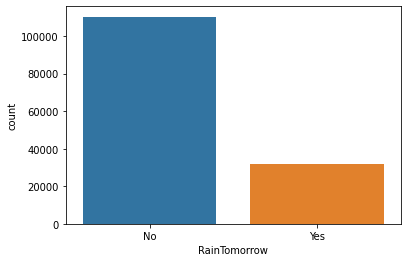

In [7]:
sns.countplot(x = 'RainTomorrow', data = df)

There is a visible class imbalance. We will look into this during preprocessing stage. Lets check for distribution of the dataset

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

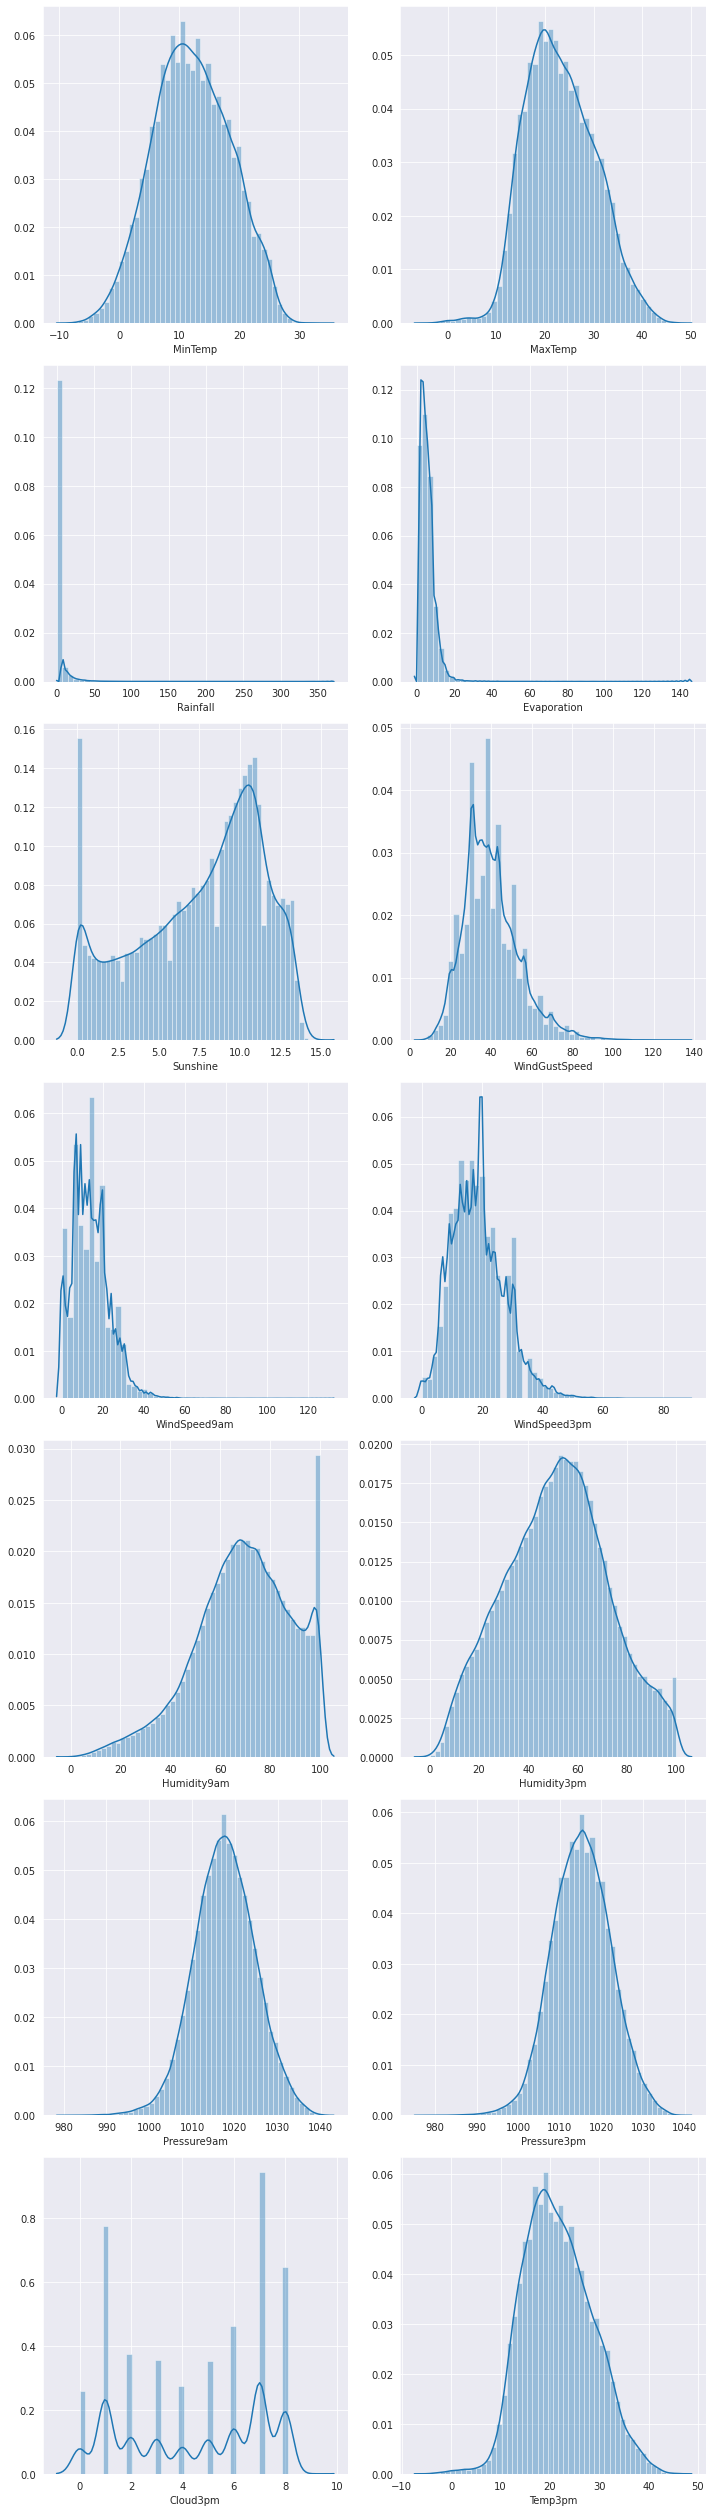

In [9]:
sns.set_style('darkgrid')
cols = ['MinTemp',	'MaxTemp',	'Rainfall',	'Evaporation',	'Sunshine',	'WindGustSpeed',	'WindSpeed9am',	'WindSpeed3pm',	'Humidity9am',	'Humidity3pm',	'Pressure9am',	'Pressure3pm',	'Cloud3pm',	'Temp3pm']
n_rows = 7
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

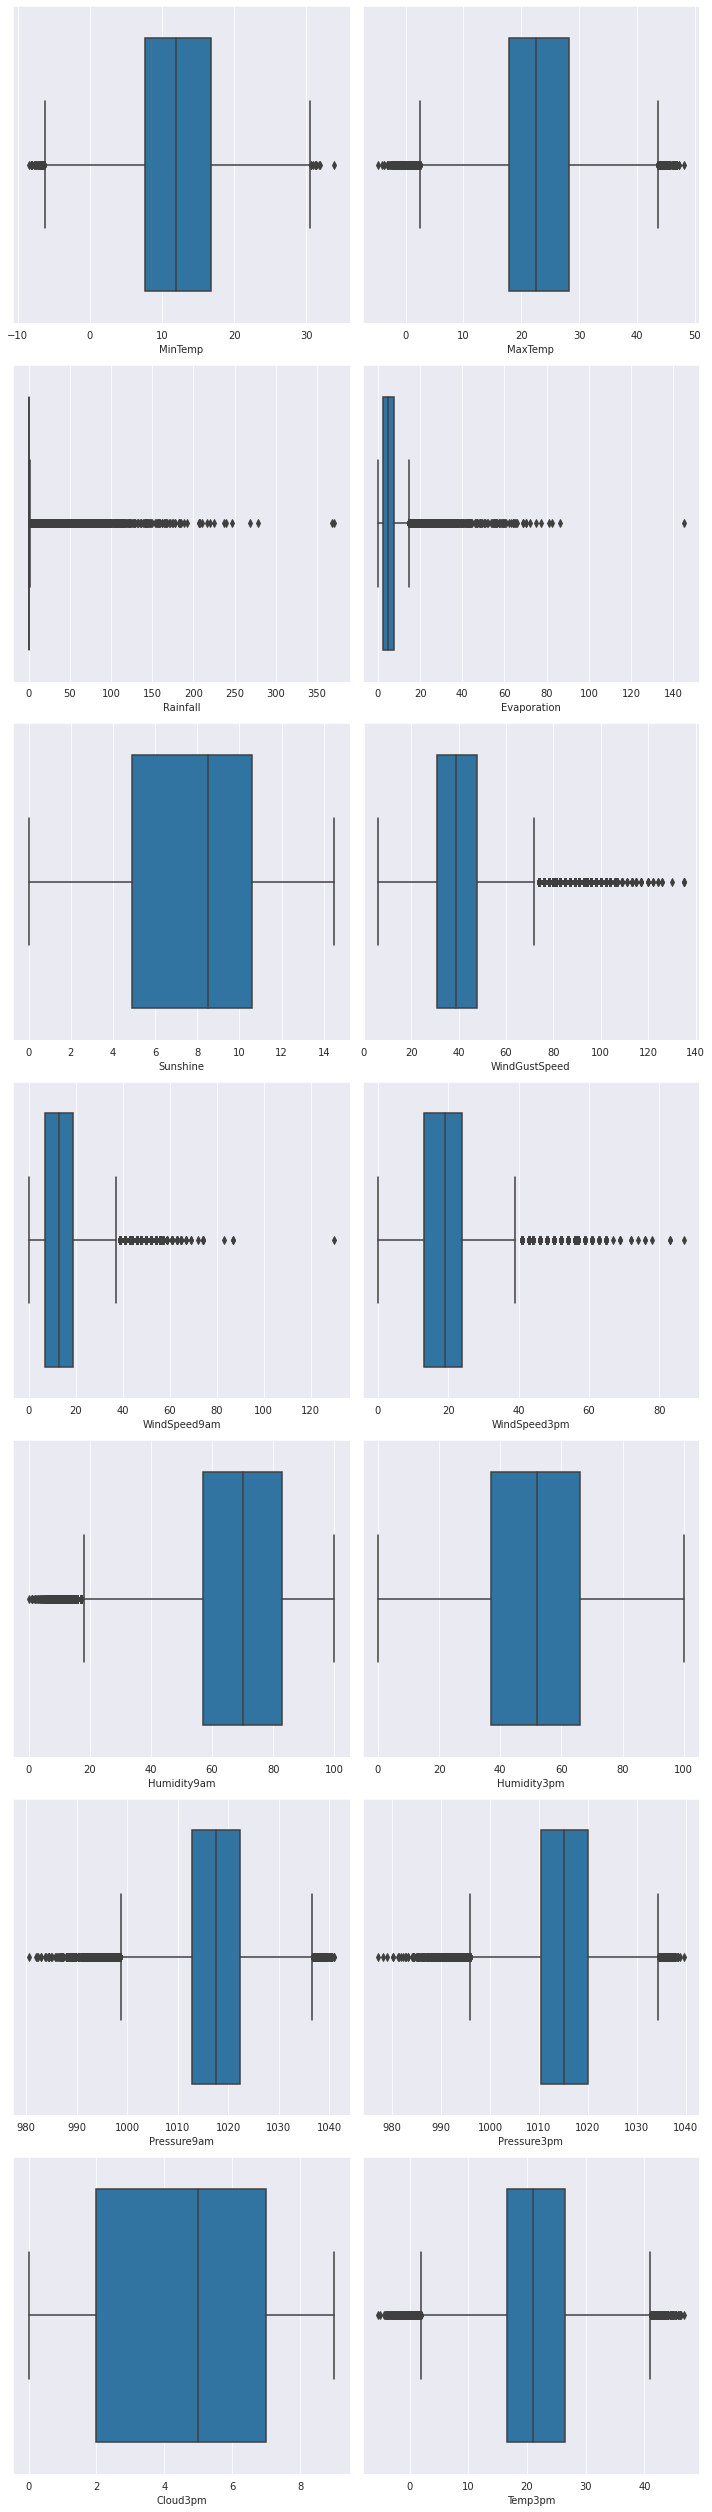

In [10]:
sns.set_style('darkgrid')
cols = ['MinTemp',	'MaxTemp',	'Rainfall',	'Evaporation',	'Sunshine',	'WindGustSpeed',	'WindSpeed9am',	'WindSpeed3pm',	'Humidity9am',	'Humidity3pm',	'Pressure9am',	'Pressure3pm',	'Cloud3pm',	'Temp3pm']
n_rows = 7
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

Observations:

1. Large number of outliers in MaxTemp, Evaporation, WIndGustSpeed, WindSpeed9am, WindSpeed3am, Humidity9am, Pressure9am, Temp3pm
2. distribution also uneven for these features

Lets check for correlation

In [11]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989


(10.0, 0.0)

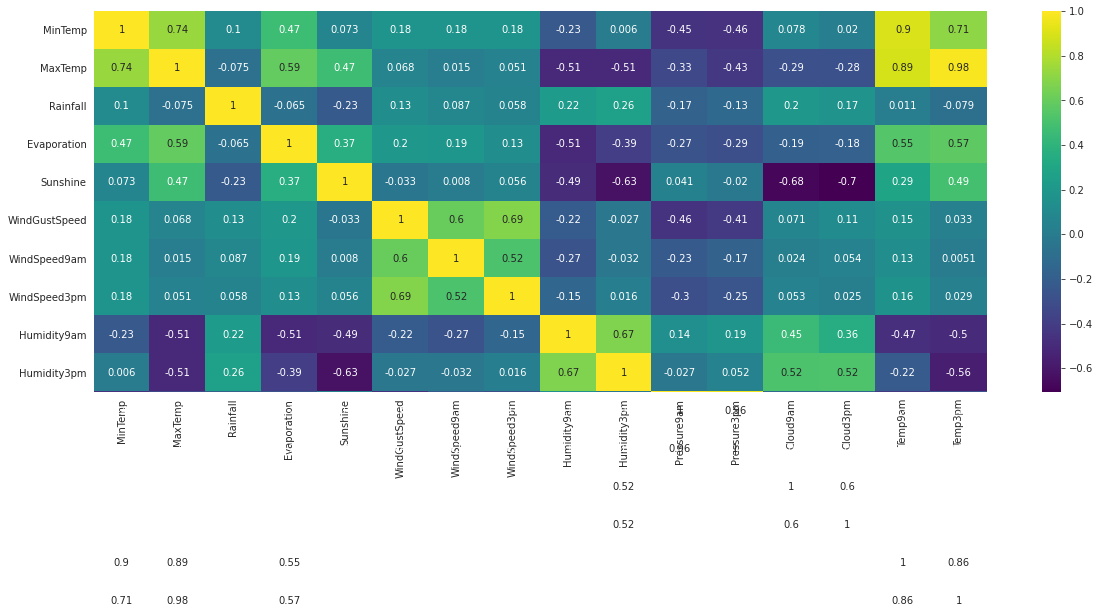

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

Lets check relationships between highly correlated features

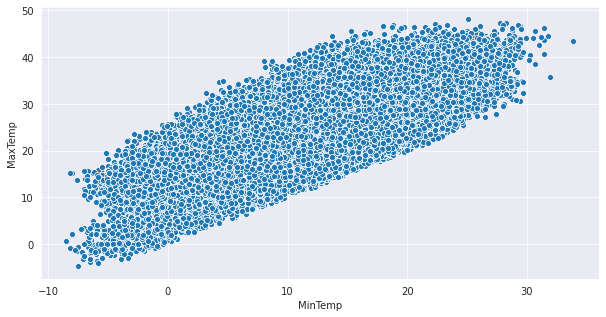

In [13]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'MinTemp', y = 'MaxTemp', data = df)

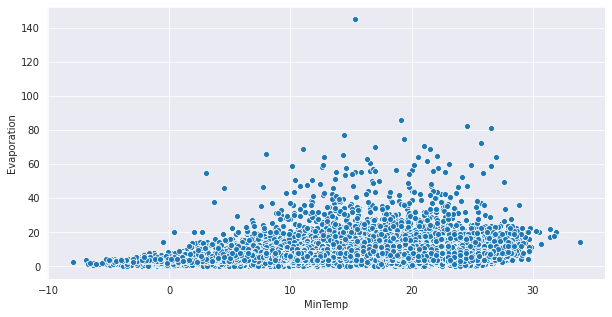

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'MinTemp', y = 'Evaporation', data = df)

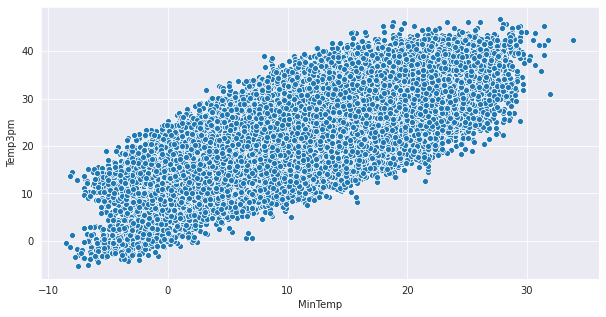

In [15]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'MinTemp', y = 'Temp3pm', data = df)

MinTemp shows linear relationship or direct propotionality with MaxTemp and Temp3pm. This may cause multicoliniearity and thus model to be chosen will have to be accroding to this.  Evaporation shows little relationship with MinTemp apart from a few outliers

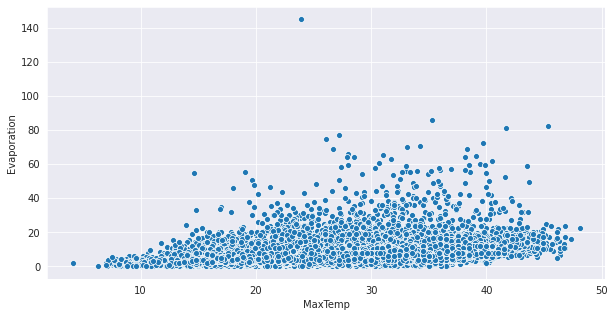

In [16]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'MaxTemp', y = 'Evaporation', data = df)

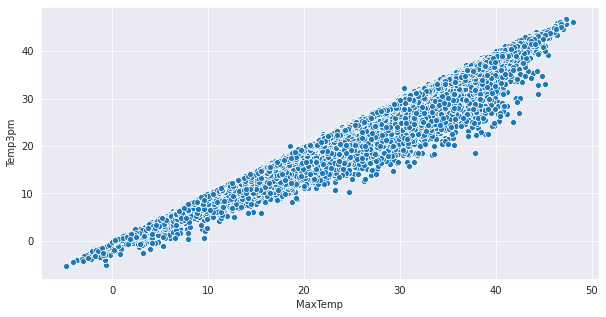

In [17]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'MaxTemp', y = 'Temp3pm', data = df)

MaxTemp too shows direct propotionality with Temp3pm and little relation with evaporation

In [18]:
df['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [19]:
df['RainToday'] = df['RainToday'].map({'Yes':1 , 'No': 0})

In [20]:
df.corr()['RainToday'].drop('RainToday').sort_values

<bound method Series.sort_values of MinTemp          0.056185
MaxTemp         -0.228884
Rainfall         0.500997
Evaporation     -0.187975
Sunshine        -0.330635
WindGustSpeed    0.155490
WindSpeed9am     0.102267
WindSpeed3pm     0.080074
Humidity9am      0.353358
Humidity3pm      0.378766
Pressure9am     -0.189804
Pressure3pm     -0.106298
Cloud9am         0.305950
Cloud3pm         0.272149
Temp9am         -0.096593
Temp3pm         -0.234925
Name: RainToday, dtype: float64>

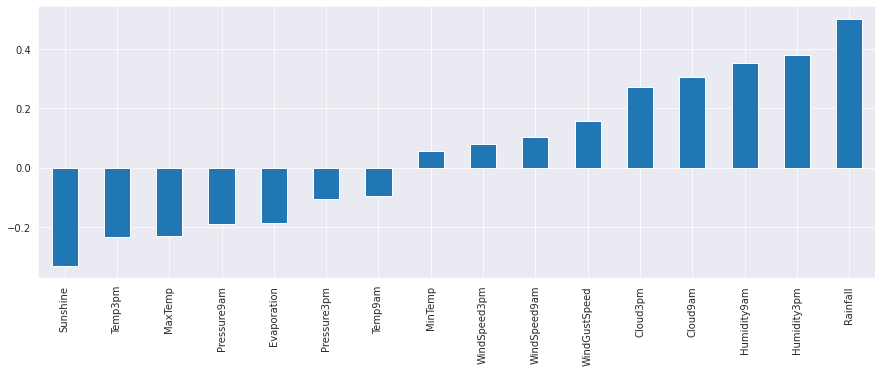

In [21]:
plt.figure(figsize = (15,5))
df.corr()['RainToday'].drop('RainToday').sort_values().plot(kind = 'bar')

This gives an indication for the important features we can include for our target variable. Lets also check for correlation between Rainfall today and Rainfall Tomorrow

In [22]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [23]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1 , 'No': 0})

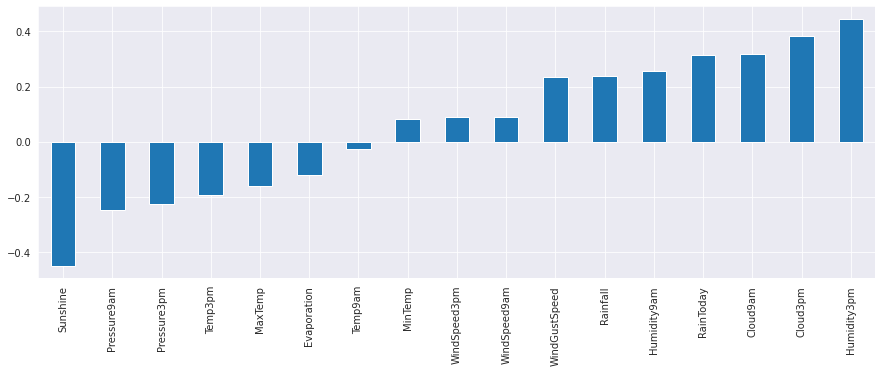

In [24]:
plt.figure(figsize = (15,5))
df.corr()['RainTomorrow'].drop('RainTomorrow').sort_values().plot(kind = 'bar')

RainTomorrow shows promising correlation with RainToday apart from other features. Now we know the important features for the model training


In [25]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


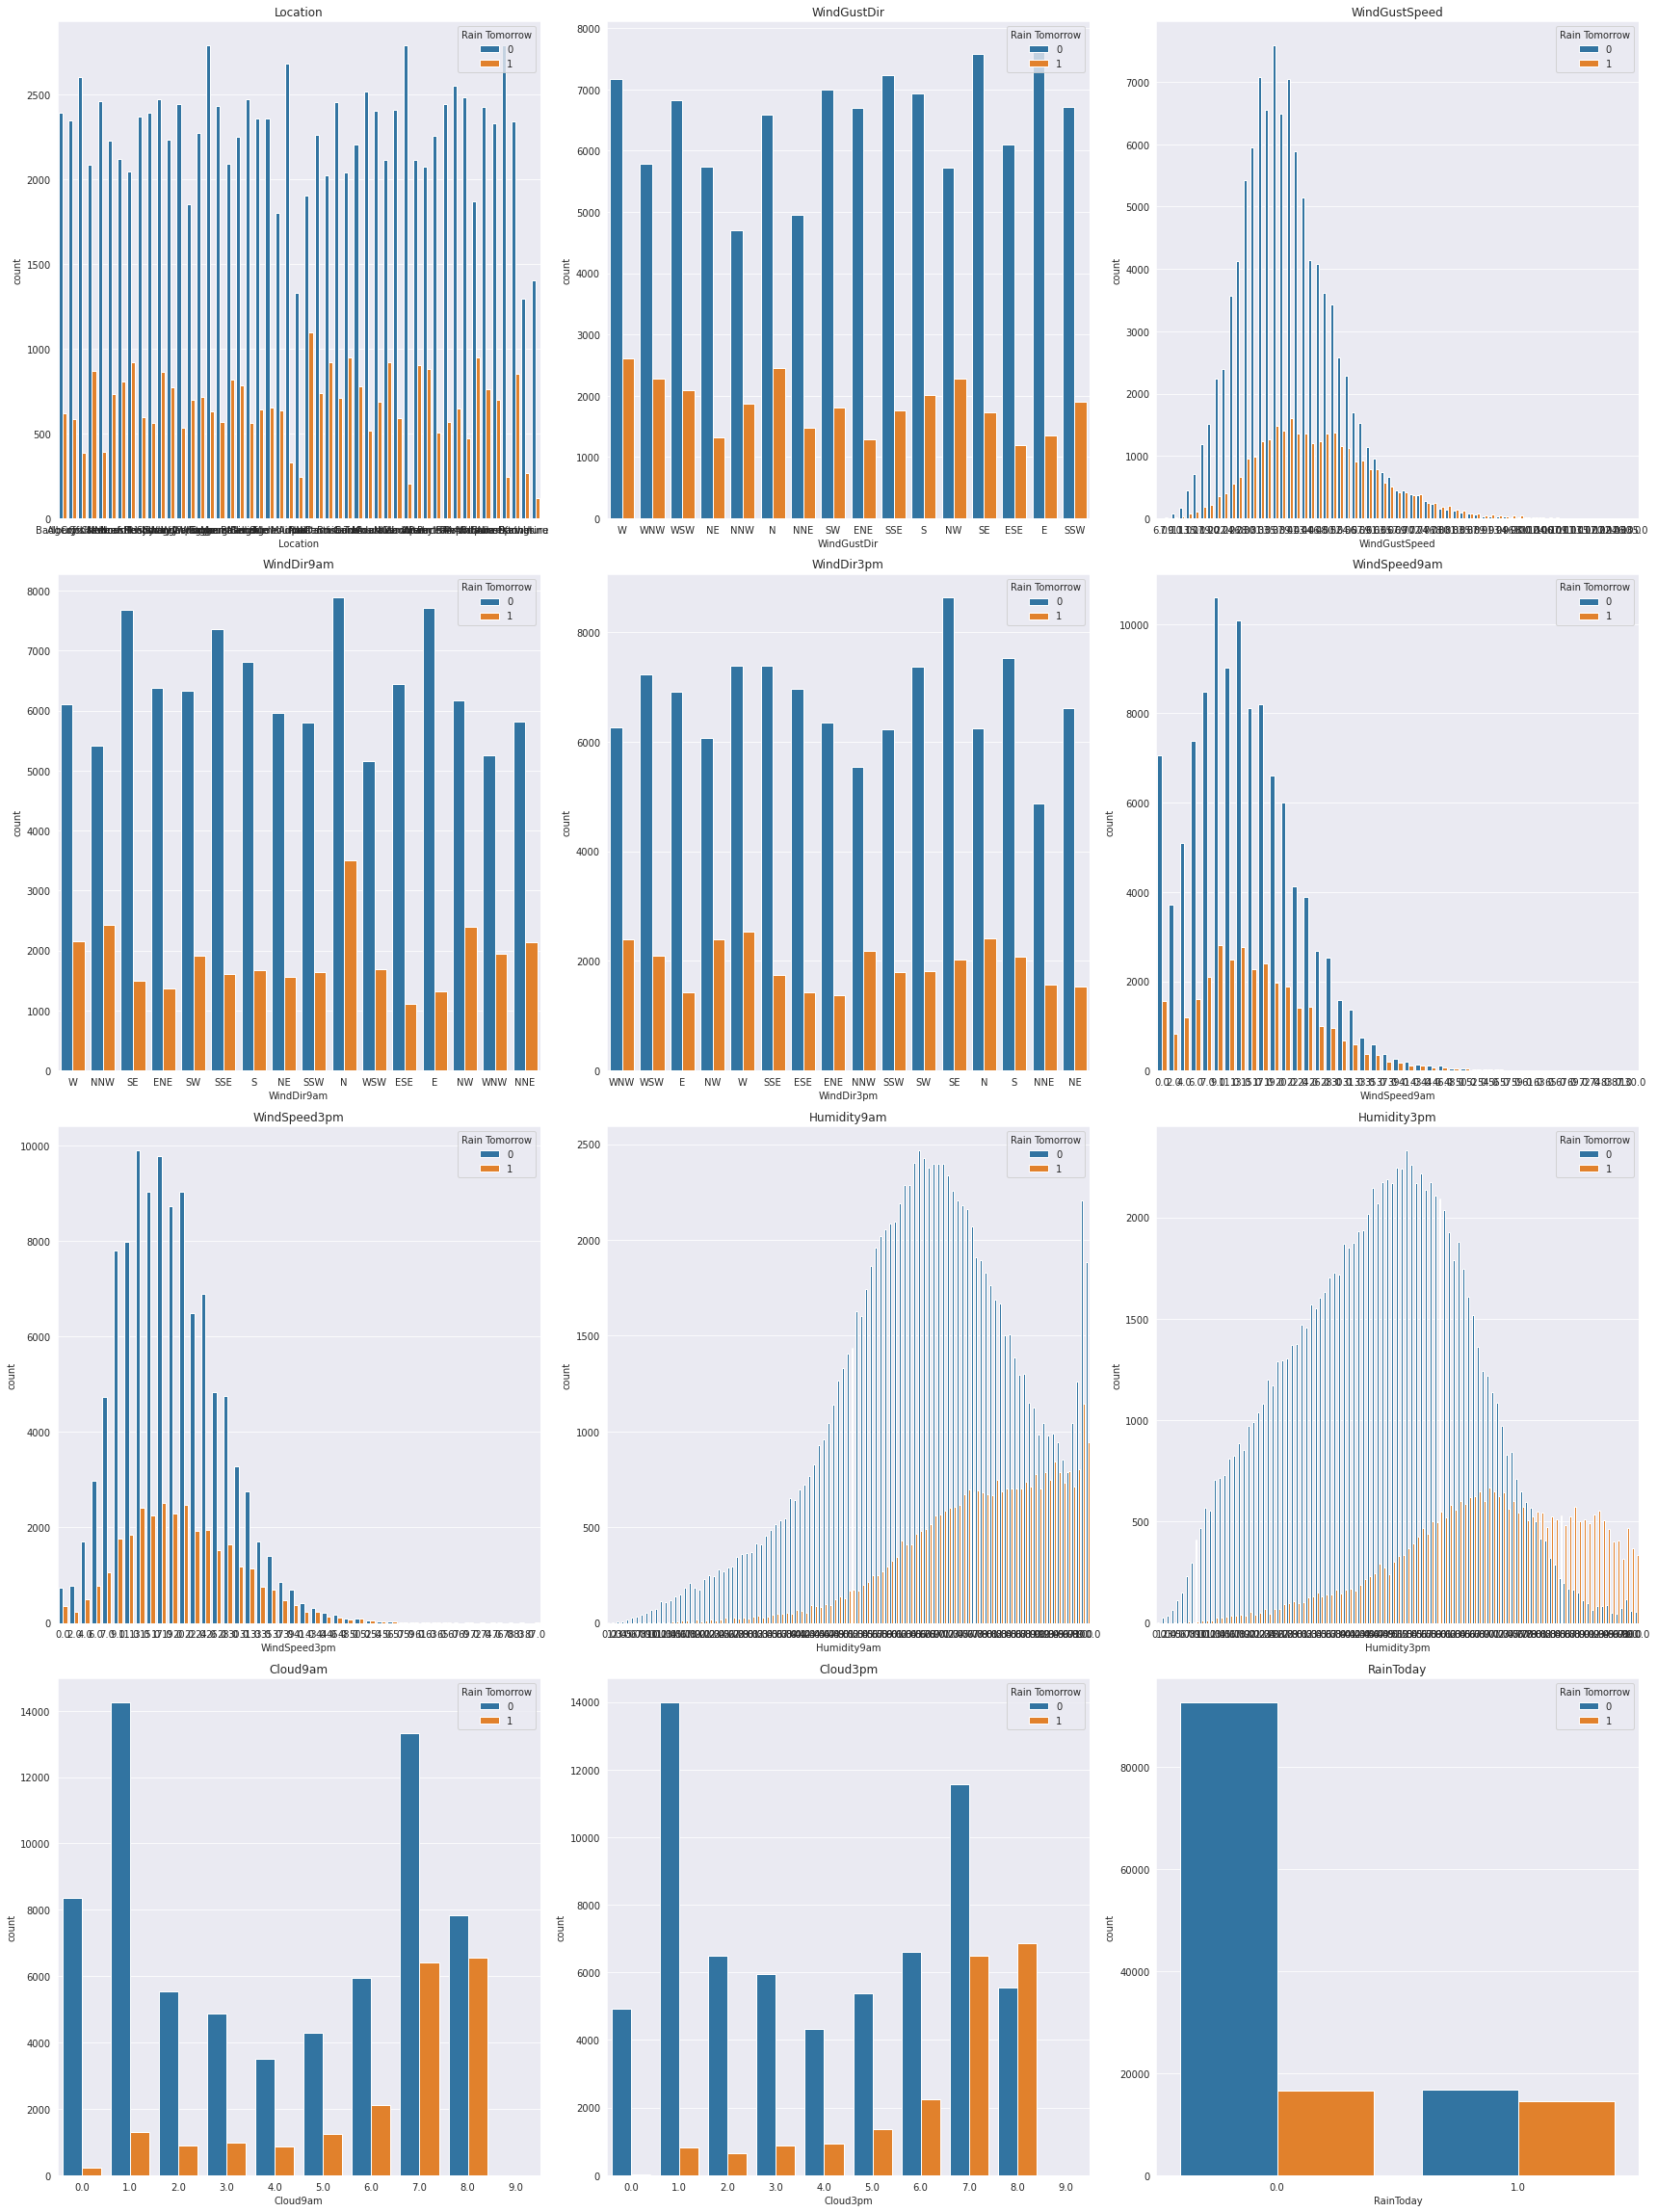

In [26]:
cols = [ 'Location',
        'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud9am', 'Cloud3pm', 'RainToday']

n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  # setting index to go through each columns
        ax = axs[r][c]   # Just to show where to position each of the 4 subplots
        
        #Creating subplots - using i to loop though each of the 4 columns we created
        sns.countplot(df[cols[i]], hue = df['RainTomorrow'], ax = ax)
        
        # Setting title for each chart
        ax.set_title(cols[i])
        
        #Setting legend for each chart
        ax.legend(title = 'Rain Tomorrow', loc = 'upper right')
plt.tight_layout()


Observations:

1. Rainfall tomorrow uniformly diftributed across locations and Wind Speed Directions
2. Possibility of rainfall tomorrow increases with increase in wind speed and vice versa.
3. Possibility of Rainfall increases with increase in Humidity9am and vice versa
4. Humidity3pm shows different behaviour compared to 9am
5. Cloud at both 9am and 3pm affects possibility of rainfall

In [27]:
df['Date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
142188    2017-06-20
142189    2017-06-21
142190    2017-06-22
142191    2017-06-23
142192    2017-06-24
Name: Date, Length: 142193, dtype: object

In [28]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
142188     6
142189     6
142190     6
142191     6
142192     6
Name: Month, Length: 142193, dtype: int64

In [29]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [30]:
df['Month'].value_counts()

May    13055
Mar    13036
Jan    12921
Jun    12389
Oct    11804
Jul    11779
Aug    11762
Nov    11461
Sep    11345
Apr    11306
Dec    10810
Feb    10525
Name: Month, dtype: int64

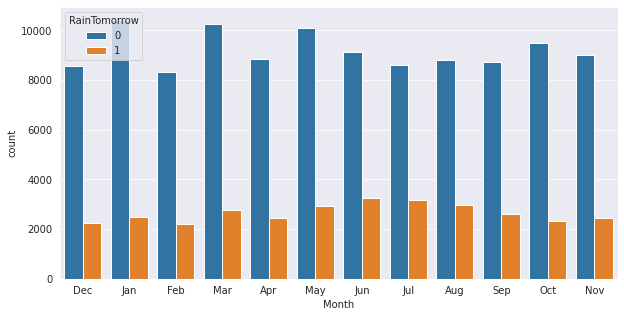

In [31]:
plt.figure(figsize= (10,5))
sns.countplot(df['Month'], hue = df['RainTomorrow'])

Month does not show any significant effect on rainfall possibility




In [32]:
df = df.drop('Month', axis = 1)

In [33]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "float64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Other Columns:  ['RainTomorrow']


In [34]:
def ctgplt(variable,to):
    
    "Function for visualization of categorical variables."
    
    var = df[variable]
    values=var.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    g = sns.barplot(x = variable, y = to, data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()
    
    print("{}:\n{}".format(variable,values))

def numplt(data,variable,to):
  
  "Function for visualization of numerical variables."

  c = sns.FacetGrid(data,col=to,height=6)
  c.map(sns.distplot,variable,bins=25)
  plt.show()

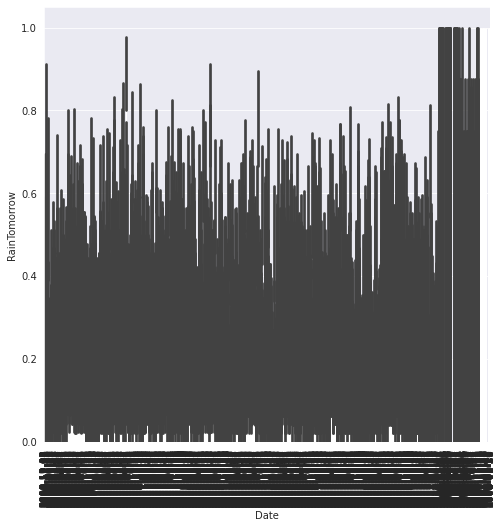

Date:
2014-02-26    49
2014-11-23    49
2013-08-29    49
2017-02-20    49
2014-12-01    49
              ..
2007-12-18     1
2007-12-30     1
2007-12-29     1
2007-11-05     1
2007-12-31     1
Name: Date, Length: 3436, dtype: int64


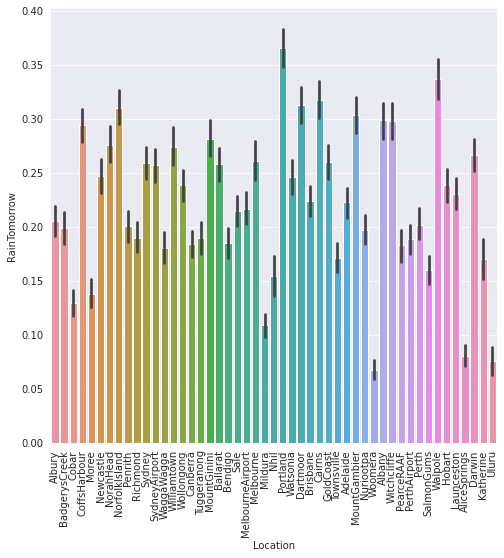

Location:
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek  

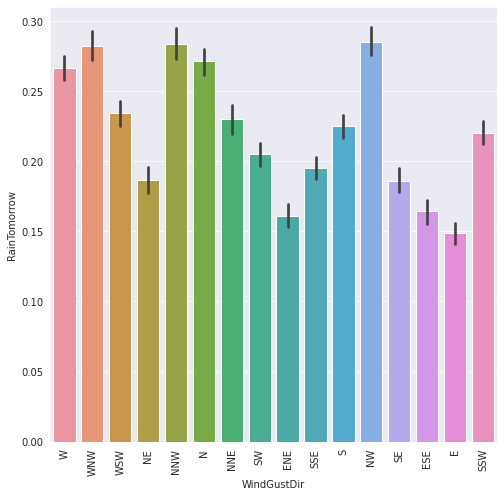

WindGustDir:
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64


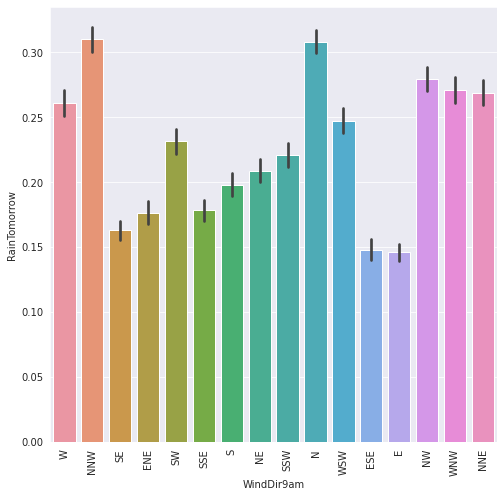

WindDir9am:
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64


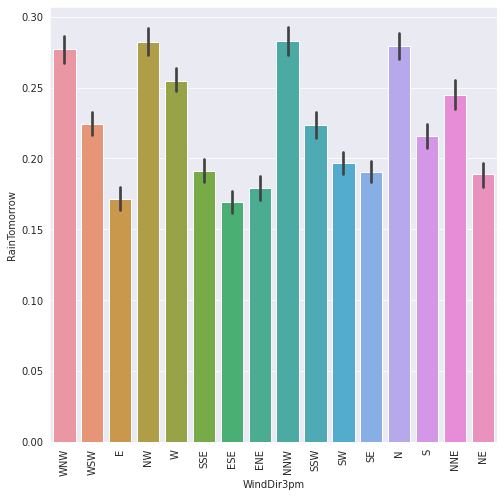

WindDir3pm:
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64


In [35]:
for i in cat_cols:
    ctgplt(i, "RainTomorrow")

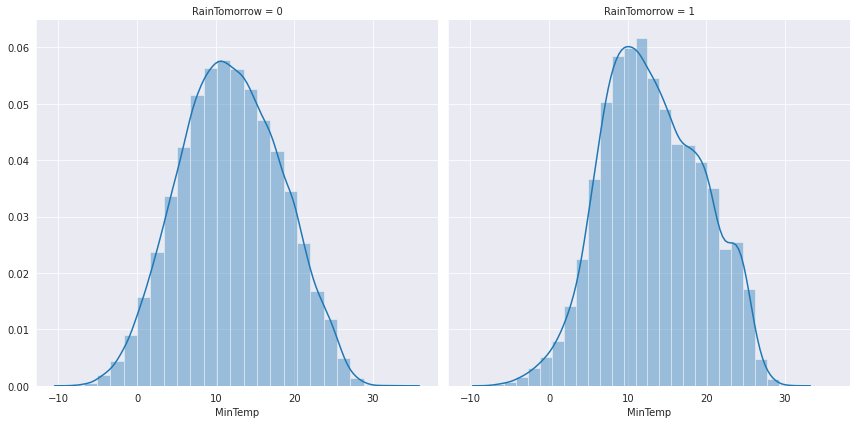

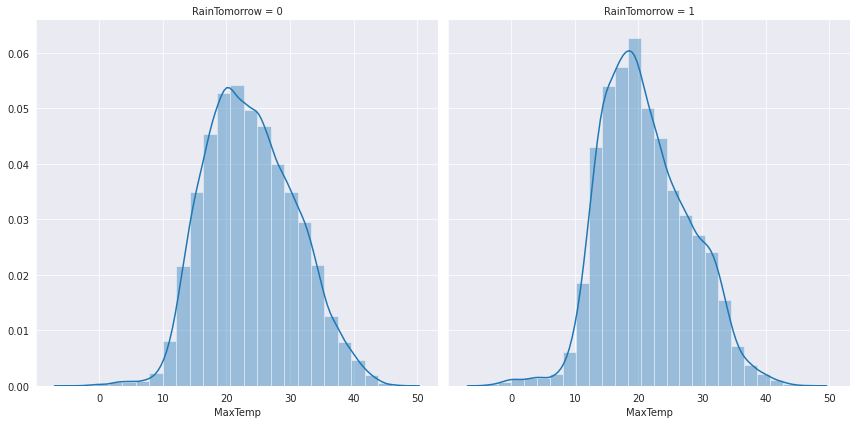

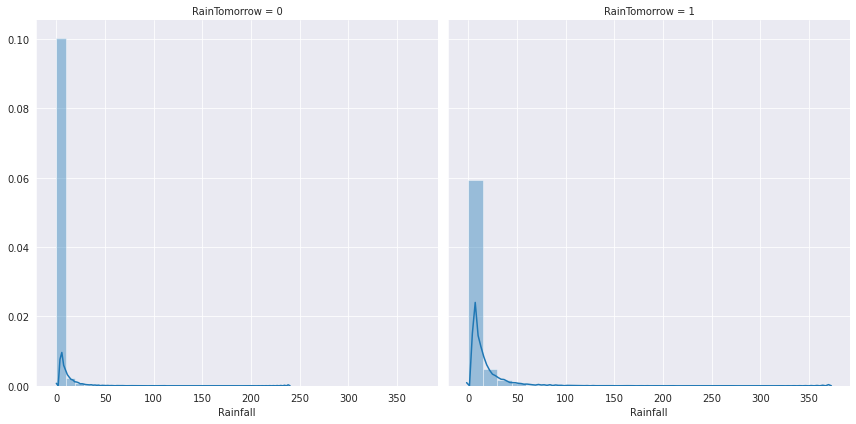

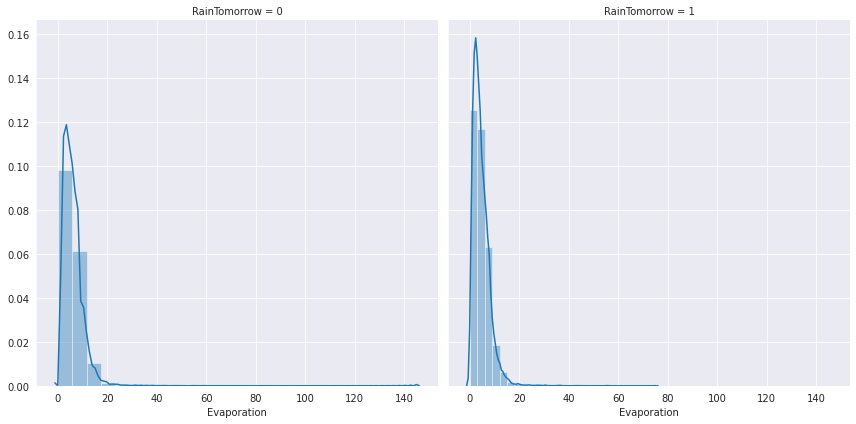

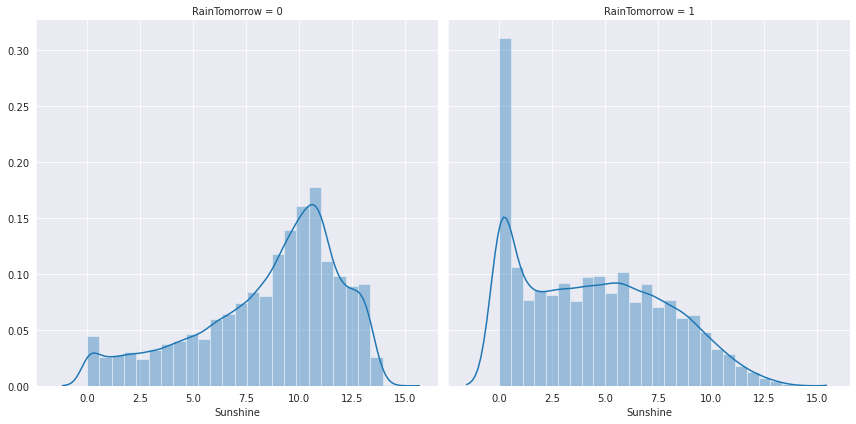

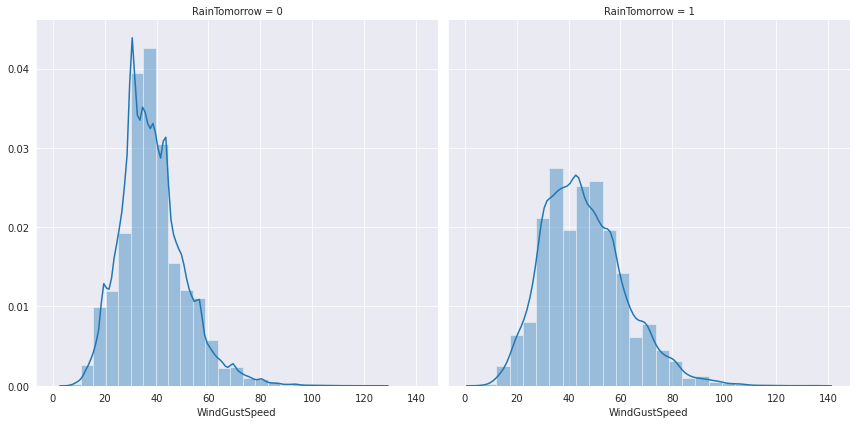

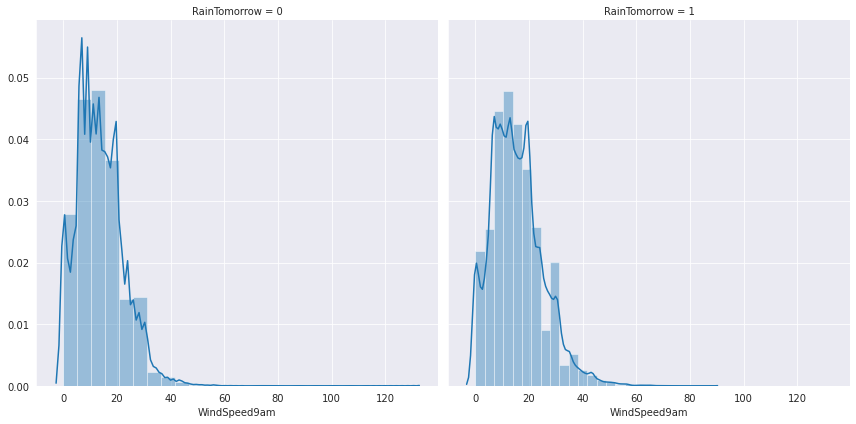

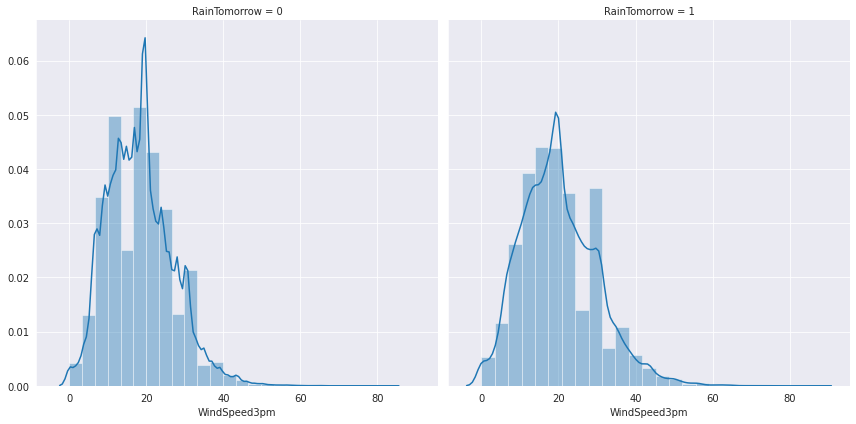

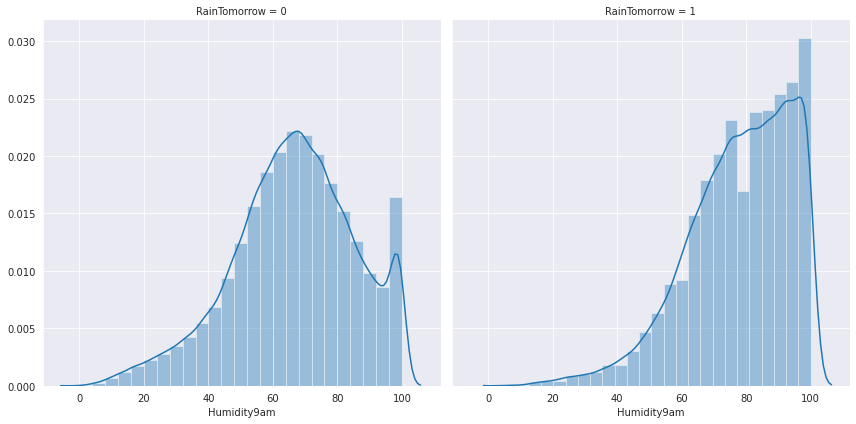

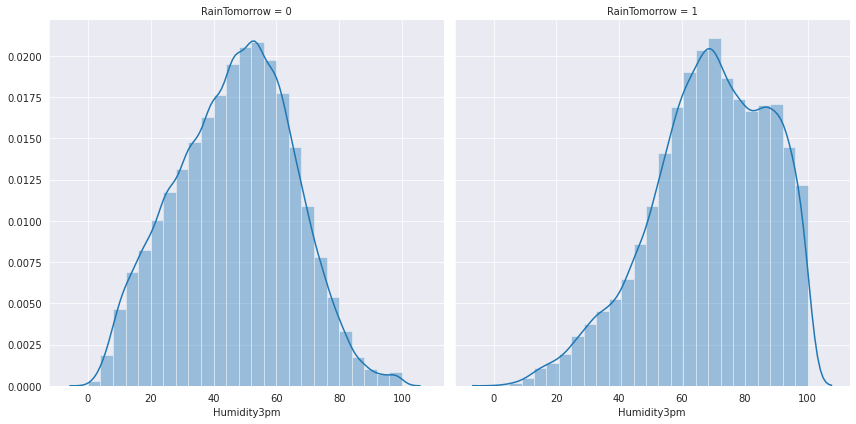

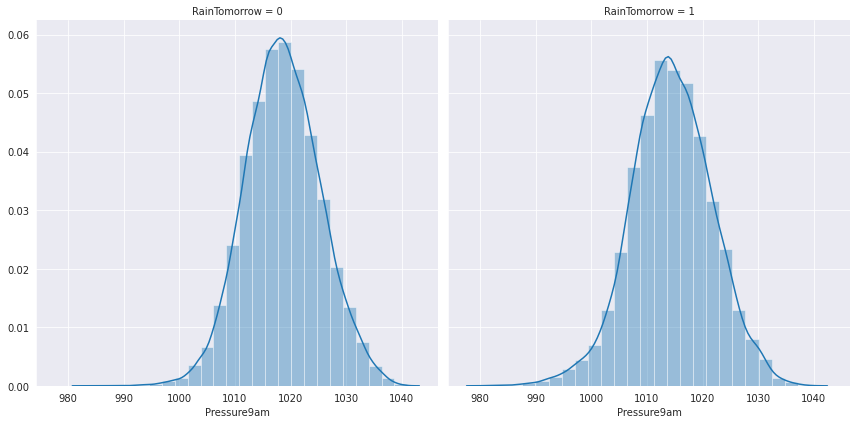

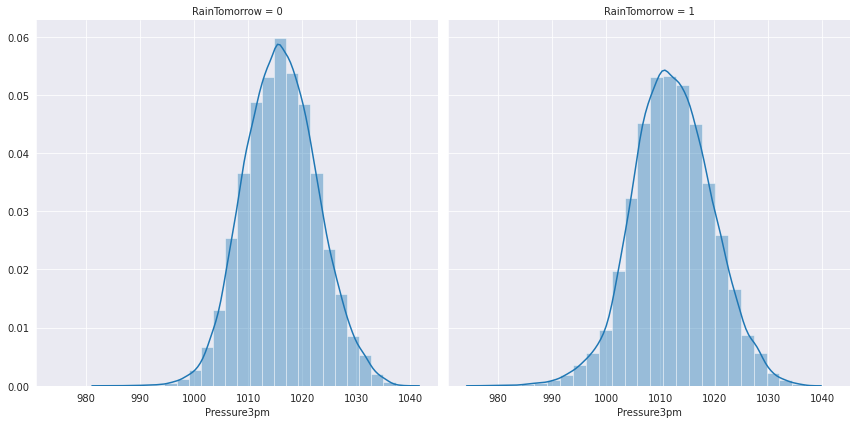

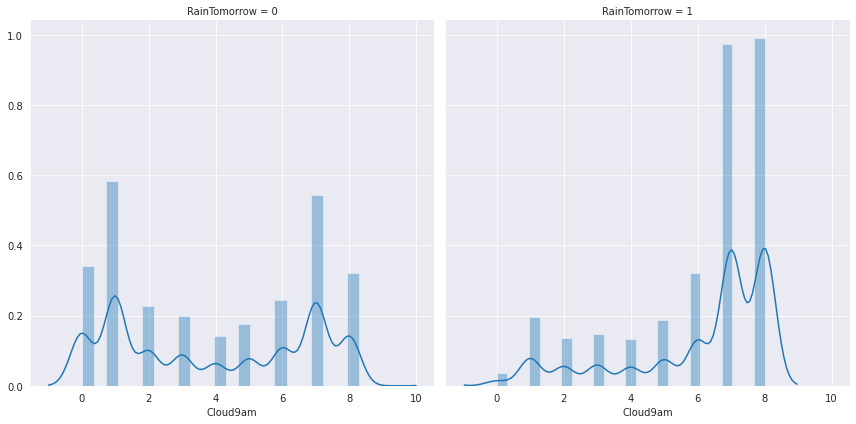

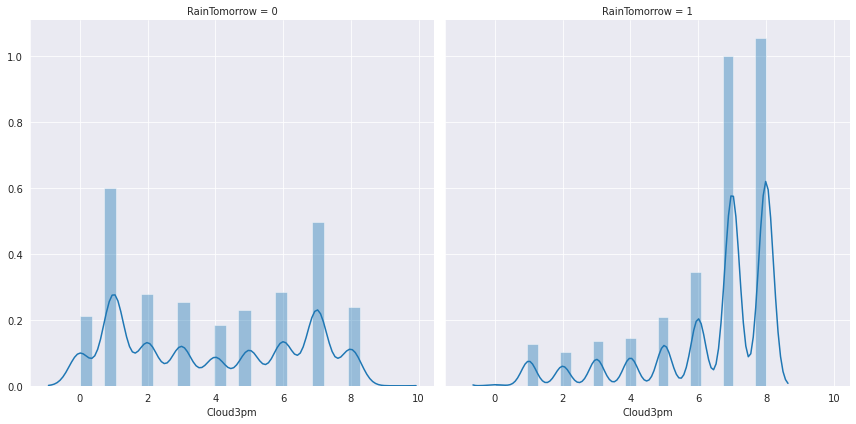

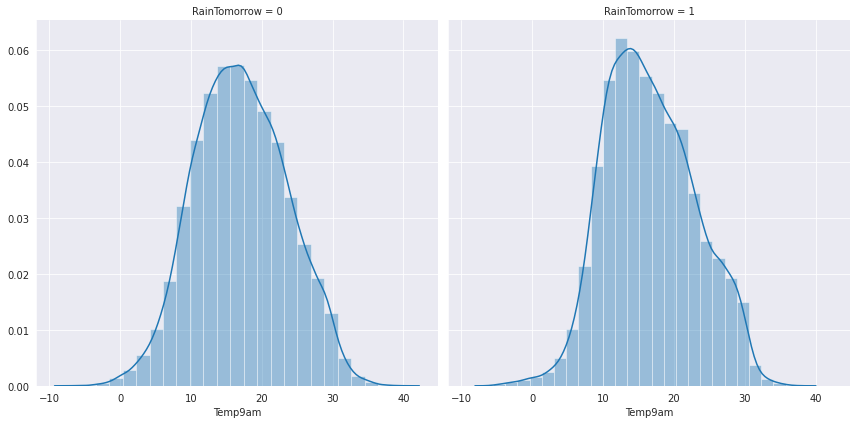

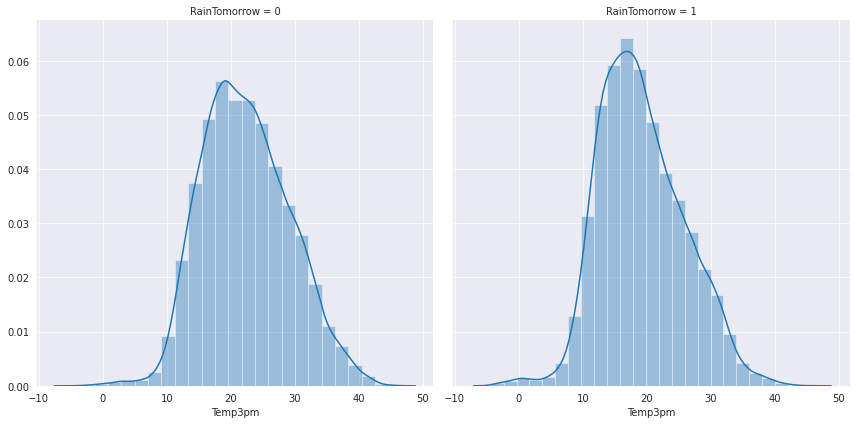

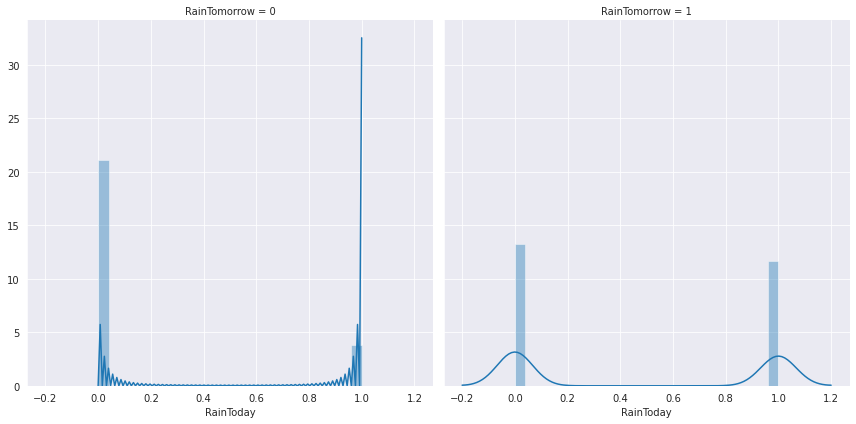

In [36]:
for k in num_cols:
    numplt(df, k, "RainTomorrow")

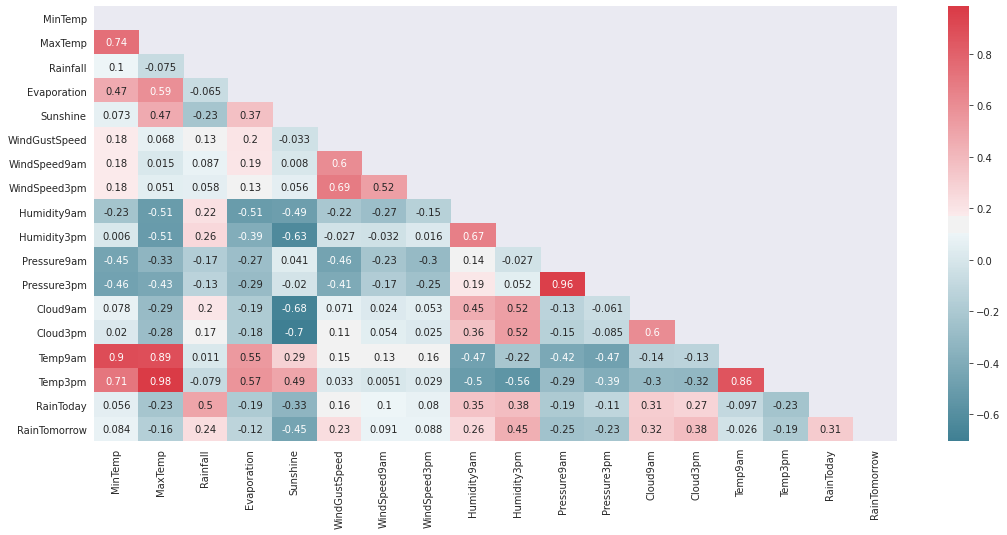

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

We have some highly correlated features. This collinear features wont do any good to our models. So we need to drop one of them.
Columns to drop: Temp3pm, Temp9am, Pressure9am. Lets drop these columns and look our correlation matrix again.

In [38]:
df.drop(columns = ["Temp3pm", "Temp9am", "Pressure9am"], axis=1, inplace = True)

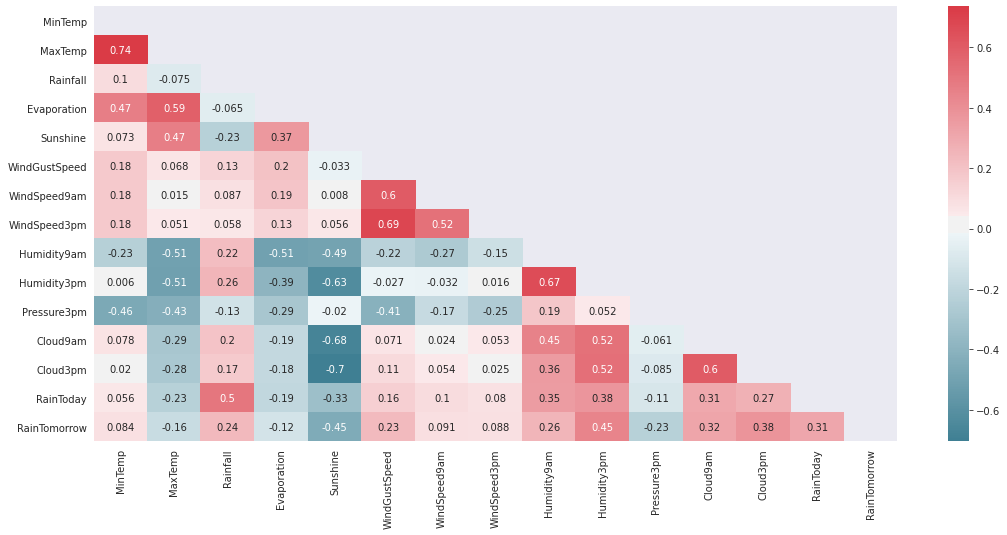

In [39]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

**Data Preprocessing**



In [40]:
to_remove = ("Temp3pm", "Temp9am", "Pressure9am")
num_cols = [each for each in num_cols if each not in to_remove]


Lets now remove outliers. Rainfall and Evaopration columns have most outliers.

In [41]:
Q3 = df["Rainfall"].quantile(0.75)
Q1 = df["Rainfall"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["Rainfall"].fillna(1) < (maxm)]

Q3 = df["Evaporation"].quantile(0.75)
Q1 = df["Evaporation"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["Evaporation"].fillna(1) < (maxm)]

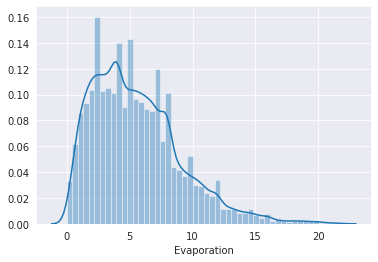

In [42]:
sns.distplot(df["Evaporation"])
plt.show()

Now Lets check for missing values

In [43]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)



,Missing Values,% of Total Values
Sunshine,57521,47.7
Evaporation,51456,42.6
Cloud3pm,49445,41.0
Cloud9am,46526,38.6
Pressure3pm,11926,9.9
WindDir9am,8904,7.4
WindGustDir,7665,6.4
WindGustSpeed,7623,6.3
WindDir3pm,3130,2.6
Humidity3pm,2965,2.5


Most of the missing value percentages is between 0 - 10.
Cloud columns, Evaporation and Sunshine features have 40% missing data.
we will fill categorical variables with mode and numerical variables with median.






We can drop the date column rather than splitting into 3 different columns for this approach. The same can be done for Evaporation, Cloud9am, Cloud3pm and Sunshine columns since they have very high missing values and filling them with mean or median would effect the results of our model.

In [44]:
df = df.drop('Date', axis = 1)

In [46]:
df = df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis = 1)

In [47]:
missing_values_table(df)

,Missing Values,% of Total Values
Pressure3pm,11926,9.9
WindDir9am,8904,7.4
WindGustDir,7665,6.4
WindGustSpeed,7623,6.3
WindDir3pm,3130,2.6
Humidity3pm,2965,2.5
WindSpeed3pm,2185,1.8
Humidity9am,1454,1.2
Rainfall,1405,1.2
RainToday,1405,1.2


We can now fill nan values of all other columns with mean and medians depending on category.

In [49]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "float64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'RainToday']
Other Columns:  ['RainTomorrow']


In [50]:
for i in cat_cols:
    df[i].fillna(value=df[i].mode()[0],inplace=True)

for k in num_cols:
    df[k].fillna(value=df[k].median(),inplace=True)

In [51]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

Now lets take dummies for categorical columns

In [52]:
dummies = pd.get_dummies(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm' ]],drop_first=True)

In [53]:
df = df.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1)

In [54]:
df = pd.concat([df, dummies], axis = 1)

In [55]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
